In [45]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pylab import rcParams
from datetime import datetime as dt
from sklearn.linear_model import Ridge
lr = Ridge()
import scipy.stats
from tabulate import tabulate

In [48]:
#read in irish data
df_trends_bovine_data = pd.read_csv(r'trends_bovine_data.csv',header=0)#reading in irish bovine data file, DATASET 1
df_milk_sales8021 = pd.read_csv(r'milk_sales_80-21.csv',header=0)# DATASET 2
df_milk_prices0721 = pd.read_csv(r'milk_prices_07-21.csv',header=0)# DATASET 3
df_milk_sales0721 = pd.read_csv(r'milk_sales_07-21.csv',header=0)# DATASET 
df_irish_cheese1022 = pd.read_csv(r'irish_dairy_produce_10-22_Cheese.csv',header=0)# DATASET 
df_irish_butter1022 = pd.read_csv(r'irish_dairy_produce_10-22_Butter.csv',header=0)# DATASET 
df_irish_skimmedmilkpowder1022 = pd.read_csv(r'irish_dairy_produce_10-22_SkimmedMilkPowder.csv',header=0)# DATASET 

#reading in european data
df_eumilk_produce9021 = pd.read_csv(r'DairyMilk_produce_europe.csv',header=0)# DATASET
df_eucheese_produce9021 = pd.read_csv(r'DairyCheese_produce_europe.csv',header=0)# DATASET 
df_eubutter_produce9021 = pd.read_csv(r'DairyButter_produce_europe.csv',header=0)# DATASET
df_eucheese_produce9021 = pd.read_csv(r'DairySkimmedMilkPowder_produce_europe.csv',header=0)# DATASET 



In [55]:
df_eumilk_produce9021.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2015,2016,2017,2018,2019,2020,2021e,2021e/2011,2021e/2020,2011-2021e
0,Belgium,813,800,888,827,793,782,776,733,709,...,723,689,678,673,676,717,649,-2.7,-9.6,-0.3
1,Bulgaria,586,368,307,216,190,156,160,88,27,...,77 e,67,73,74,74,77,78,15.3,0.6,1.4
2,Czechia,895,879,639,530,494,475,496,503,504,...,647,616,635,607,614,623,622,-4.0,-0.1,-0.4
3,Denmark,534,532,520,509,511,519,521,513,519,...,519,519,518,516,514,508,497,5.2,-2.2,0.5
4,Germany,"4,094","4,974","5,245","5,255","5,437","5,603","5,613","5,503","5,404",...,"4,860","4,843","4,595","4,452","4,597","4,635","4,447",-15.1,-4.1,-1.6


In [124]:
#dropping first and 3rd columns
#df_eumilk_produce9021.drop(columns=["ID",'code'], inplace=True) #dropping columns
df_eumilk_produce9021.head()
#subsetting dataset for years producing most bovine population and years 2000-2020 using iloc indexer
#"Spain",'Germany','France','Italy','Ireland',denmark, romania= rows


df_eumilk_produce2020=df_eumilk_produce9021.iloc[[3,8,4,9,11,22,6],[0,21,22,23,24,25,26,27,28,29,30,31]] 
df_eumilk_produce92020

xdf_eumilk_produce2020=df_eumilk_produce2020[['country','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]
xdf_eumilk_produce2020.head()
#melting data for graph
df_eumilk_produce2020melt = pd.melt(xdf_eumilk_produce2020, id_vars=['country'],  value_vars=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'], var_name='year',value_name='number')
df_eumilk_produce2020melt.head()
df_eumilk_produce2020melt= pd.melt(xdf_eumilk_produce2020, id_vars=['country'],  value_vars=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'], var_name='year',value_name='number')

df_eumilk_produce2020melt=df_eumilk_produce2020melt.replace(',','',regex=True)#removal of special characters
df_eumilk_produce2020melt=df_eumilk_produce2020melt.replace('e','',regex=True)#removal of special characters
df_eumilk_produce2020melt=df_eumilk_produce2020melt.replace('b','',regex=True)#removal of special characters

#df_eumilk_produce2020melt['number'].astype(int)
df_eumilk_produce2020melt['number']=df_eumilk_produce2020melt['number'].astype(int)

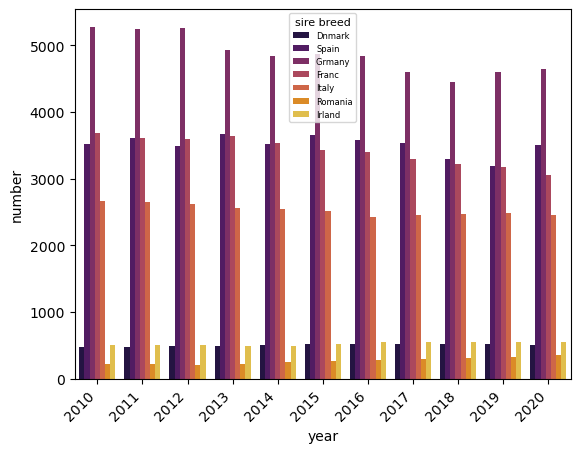

In [130]:
chart=sns.barplot(x = "year", y = "number", hue = "country", data = df_eumilk_produce2020melt,ci = "sd",palette='inferno');
#rotating ax tick labels to fit
sequential_colors = sns.color_palette("inferno", 10)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(title='sire breed', fontsize='6', title_fontsize='8')
#pal = sns.color_palette("Greens_d", len(df_trends_calf_data_melt))
plt.show()


In [12]:
#explore dataset1 https://data.gov.ie/dataset/national-trends-in-bovine-data-2011-2021?package_type=dataset
print(df_trends_bovine_data.head()) #EDA , no cleaning required
df_trends_bovine_data.dtypes
df_trends_bovine_data.describe()#NAN values identified
print("number of null values=",df_trends_bovine_data.isnull().sum())
#best for milking is fresian 90% ireland
#graph year and born to dairy cow
#graph all on lots of small scatter plots

   Year  DAFM Slaughter plants  Disposal in LA Abattoirs  Exports  \
0  2011                1570323                     72935   215780   
1  2012                1400858                     83054   162038   
2  2013                1499551                     88754   212369   
3  2014                1648258                    100725   239993   
4  2015                1563824                    100414   182482   

   Farm to Farm    Marts  Calves Born by Sire Fresian  \
0       1027286  1655770                       690297   
1       1053544  1625660                       711812   
2       1099607  1723498                       732096   
3       1095022  1697188                       711766   
4       1223431  1717558                       733332   

   Calves Born by Sire Limousin  Calves Born by Sire Aberdeen Angus  \
0                        382919                              215535   
1                        427416                              238479   
2                        3889

In [13]:
#subsetting the data looking at cow breeds in ireland
df_trends_calf_data=df_trends_bovine_data[['Year','Calves Born by Sire Fresian','Calves Born by Sire Limousin','Calves Born by Sire Aberdeen Angus',' Calves Born by Sire Charolais','Calves Born by Sire Hereford','Calves Born by Sire Belgian Blue']]
df_trends_calf_data.head()
#melting data to 
df_trends_calf_data_melt = pd.melt(df_trends_calf_data, id_vars=['Year'],  value_vars=['Calves Born by Sire Fresian','Calves Born by Sire Limousin','Calves Born by Sire Aberdeen Angus',' Calves Born by Sire Charolais','Calves Born by Sire Hereford','Calves Born by Sire Belgian Blue'], var_name='sire_breed', value_name='number')
df_trends_calf_data_melt.head()


,Year,sire_breed,number
0,2011,Calves Born by Sire Fresian,690297
1,2012,Calves Born by Sire Fresian,711812
2,2013,Calves Born by Sire Fresian,732096
3,2014,Calves Born by Sire Fresian,711766
4,2015,Calves Born by Sire Fresian,733332


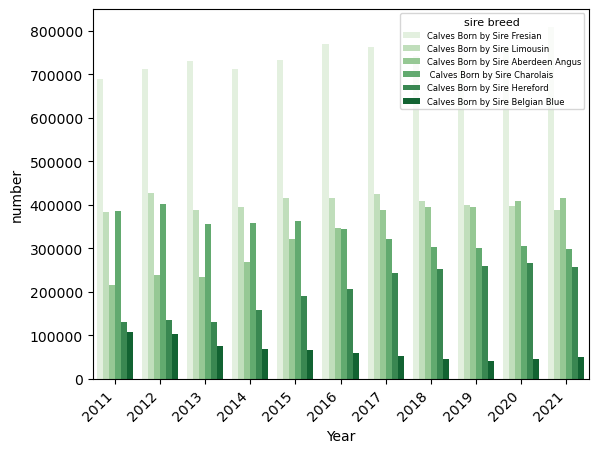

In [14]:
chart=sns.barplot(x = "Year", y = "number", hue = "sire_breed", data = df_trends_calf_data_melt,ci = "sd",palette='Greens');
#rotating ax tick labels to fit
sequential_colors = sns.color_palette("Greens", 10)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(title='sire breed', fontsize='6', title_fontsize='8')
#pal = sns.color_palette("Greens_d", len(df_trends_calf_data_melt))
plt.show()
#highest number of cows bred from fresian sires as best for milking
#increasing year on year

In [15]:
#print(df_milk_sales8021.head()) #EDA 
print(df_milk_sales8021.dtypes)
df_milk_sales8021.describe()#
#df_milk_sales8021.drop(columns=["STATISTIC","TLIST(M1)","C02064V02491"], inplace=True) #dropping columns

#separating month column
df_milk_sales8021['Month']=df_milk_sales8021['Month'].astype(str)
df_milk_sales8021['year'],df_milk_sales8021['month'] = df_milk_sales8021['Month'].str.split(' ', 2).str
print(df_milk_sales8021.head())
df_milk_sales8021.drop(columns=["Month"], inplace=True) #dropping columns


STATISTIC           object
STATISTIC Label     object
TLIST(M1)            int64
Month               object
C02064V02491         int64
Type of Milk        object
UNIT                object
VALUE              float64
dtype: object
  STATISTIC                           STATISTIC Label  TLIST(M1)  \
0     AKM02  Milk Sales (Dairy) for Human Consumption     198001   
1     AKM02  Milk Sales (Dairy) for Human Consumption     198001   
2     AKM02  Milk Sales (Dairy) for Human Consumption     198001   
3     AKM02  Milk Sales (Dairy) for Human Consumption     198001   
4     AKM02  Milk Sales (Dairy) for Human Consumption     198001   

          Month  C02064V02491                   Type of Milk            UNIT  \
0  1980 January             1                       All Milk  Million Litres   
1  1980 January            12                     Whole Milk  Million Litres   
2  1980 January            13  Skimmed and Semi-skimmed milk  Million Litres   
3  1980 January            14            

C:\Users\teresa\AppData\Local\Temp\ipykernel_21336\4190003954.py:8: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_milk_sales8021['year'],df_milk_sales8021['month'] = df_milk_sales8021['Month'].str.split(' ', 2).str


In [16]:
#missing data, only 2 sale values per month so deleting other rows
#df_milk_sales8021['VALUE'].fillna(0)
df_milk_sales8021['VALUE'] = df_milk_sales8021['VALUE'].replace(np.nan, 0) 

df_milk_sales8021['VALUE'] = pd.to_numeric(df_milk_sales8021['VALUE'] )
df_milk_sales8021['VALUE'].astype(float)

df_milk_sales8021.drop(df_milk_sales8021[df_milk_sales8021.VALUE < 1.0].index, inplace=True)
print(df_milk_sales8021.head())

   STATISTIC                           STATISTIC Label  TLIST(M1)  \
0      AKM02  Milk Sales (Dairy) for Human Consumption     198001   
1      AKM02  Milk Sales (Dairy) for Human Consumption     198001   
5      AKM02  Milk Sales (Dairy) for Human Consumption     198002   
6      AKM02  Milk Sales (Dairy) for Human Consumption     198002   
10     AKM02  Milk Sales (Dairy) for Human Consumption     198003   

    C02064V02491 Type of Milk            UNIT  VALUE  year     month  
0              1     All Milk  Million Litres   38.2  1980   January  
1             12   Whole Milk  Million Litres   38.2  1980   January  
5              1     All Milk  Million Litres   36.6  1980  February  
6             12   Whole Milk  Million Litres   36.6  1980  February  
10             1     All Milk  Million Litres   38.4  1980     March  


In [17]:
#creating new column
#create new subset
df_milk_skimmed=df_milk_sales8021.loc[df_milk_sales8021["Type of Milk"] == "Skimmed Milk", ['year', 'VALUE']]
df_milk_semiskimmed=df_milk_sales8021.loc[df_milk_sales8021["Type of Milk"] == "Semi-skimmed milk", ['year', 'VALUE']] 
df_milk_whole=df_milk_sales8021.loc[df_milk_sales8021["Type of Milk"] == "Whole Milk", ['year', 'VALUE']] 

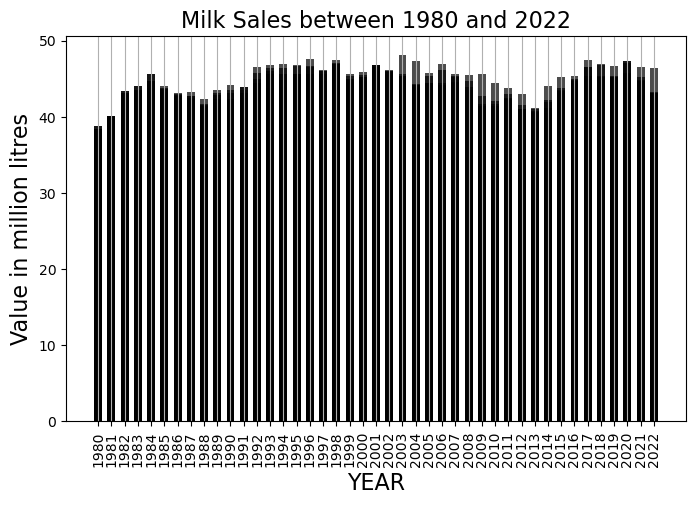

In [18]:
x = df_milk_sales8021['year']
y = df_milk_sales8021['VALUE']
plt.figure(figsize=(8,5))

plt.bar(x, y, label='Year', color='black',  width=.6, align='center', alpha=0.7)

plt.xlabel('YEAR', fontsize = 16)
plt.ylabel('Value in million litres', fontsize = 16)
plt.title('Milk Sales between 1980 and 2022'.format(x.min(), x.max()), fontsize=16)
plt.xticks(rotation=90)
    
plt.grid(axis='x')
#plt.legend()
# plt.savefig('data/images/Bar_plot.png')
plt.show()
#separate type of milk

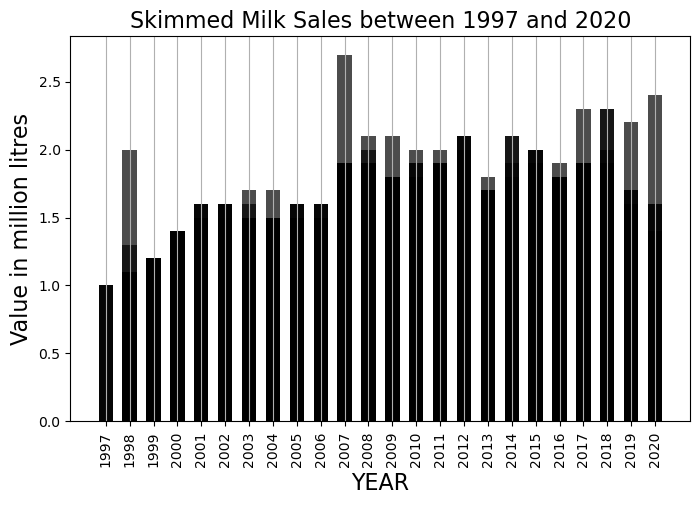

In [19]:
#looking at skimmed milk sales,  upward trend
x = df_milk_skimmed['year']
y = df_milk_skimmed['VALUE']
plt.figure(figsize=(8,5))

plt.bar(x, y, label='Year', color='black',  width=.6, align='center', alpha=0.7)

plt.xlabel('YEAR', fontsize = 16)
plt.ylabel('Value in million litres', fontsize = 16)
plt.title('Skimmed Milk Sales between 1997 and 2020'.format(x.min(), x.max()), fontsize=16)
plt.xticks(rotation=90)
    
plt.grid(axis='x')

# plt.savefig('data/images/Bar_plot.png')
plt.show()


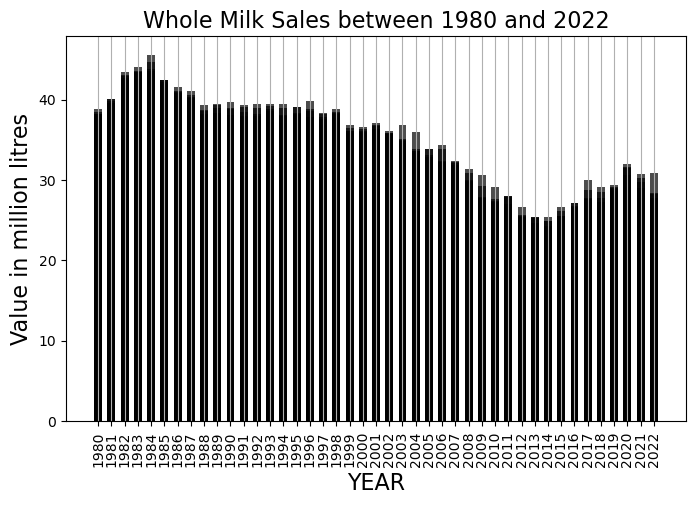

In [20]:
#looking at whole milk sales, downward trend
x = df_milk_whole['year']
y = df_milk_whole['VALUE']
plt.figure(figsize=(8,5))

lr.fit(df_milk_whole[['year']],df_milk_whole['VALUE'])
plt.bar(x, y, label='Year', color='black',  width=.6, align='center', alpha=0.7)

plt.xlabel('YEAR', fontsize = 16)
plt.ylabel('Value in million litres', fontsize = 16)
plt.title('Whole Milk Sales between 1980 and 2022'.format(x.min(), x.max()), fontsize=16)
plt.xticks(rotation=90)
    
plt.grid(axis='x')


#separate type of milk
#plt.plot(df_milk_whole['VALUE'], lr.coef_*df_milk_whole['VALUE']+lr.intercept_, color='orange')
#plt.plot(df_milk_whole['VALUE'], df_milk_whole['year'], '-o', color='orange')

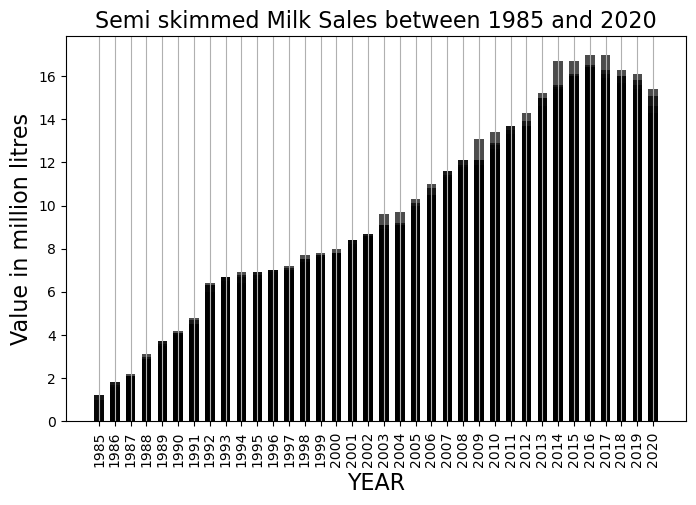

In [21]:
x = df_milk_semiskimmed['year']
y = df_milk_semiskimmed['VALUE']
plt.figure(figsize=(8,5))

plt.bar(x, y, label='Year', color='black',  width=.6, align='center', alpha=0.7)

plt.xlabel('YEAR', fontsize = 16)
plt.ylabel('Value in million litres', fontsize = 16)
plt.title('Semi skimmed Milk Sales between 1985 and 2020'.format(x.min(), x.max()), fontsize=16)
plt.xticks(rotation=90)
    
plt.grid(axis='x')
#plt.legend()
# plt.savefig('data/images/Bar_plot.png')
plt.show()
#separate type of milk

In [22]:

print(df_milk_prices0721 .dtypes)
df_milk_prices0721 .describe()
#df_milk_prices07211.drop(columns=["STATISTIC","TLIST(A1)","C02136V02577"], inplace=True) 
#dropping columns, tlist is duplicate of year and C02136V02577 no info on 
print(df_milk_prices0721.head())

STATISTIC           object
STATISTIC Label     object
TLIST(A1)            int64
Year                 int64
C02136V02577         int64
Product             object
UNIT                object
VALUE              float64
dtype: object
  STATISTIC                            STATISTIC Label  TLIST(A1)  Year  \
0     AJA07  Manufacturing Milk Prices (including VAT)       2007  2007   
1     AJA07  Manufacturing Milk Prices (including VAT)       2007  2007   
2     AJA07  Manufacturing Milk Prices (including VAT)       2008  2008   
3     AJA07  Manufacturing Milk Prices (including VAT)       2008  2008   
4     AJA07  Manufacturing Milk Prices (including VAT)       2009  2009   

   C02136V02577                                      Product  UNIT  VALUE  
0             1     Milk (per litre), actual fat and protein  Euro  0.339  
1             2  Milk (per litre), 3.7% fat and 3.3% protein  Euro  0.332  
2             1     Milk (per litre), actual fat and protein  Euro  0.337  
3             2

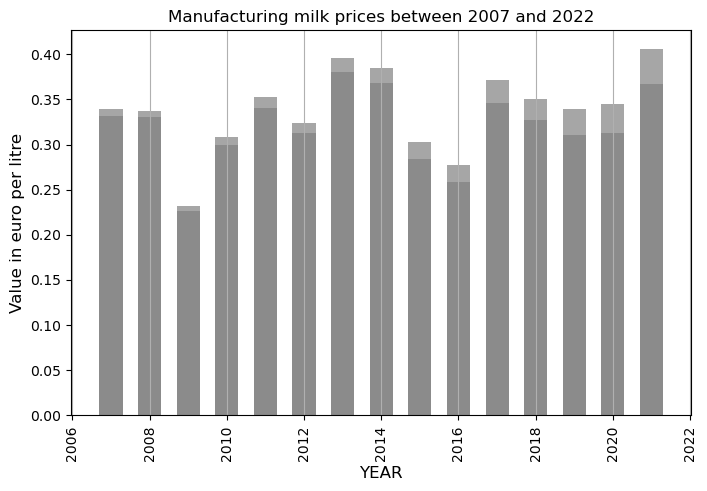

In [23]:
x = df_milk_prices0721['Year']
y = df_milk_prices0721['VALUE']
#df_milk_prices0721['VALUE']= df_milk_prices0721['VALUE'].astype(float)
#df_milk_prices0721['VALUE']= df_milk_prices0721['VALUE'].astype(float)
plt.figure(figsize=(8,5))

plt.bar(x, y, label='Year', color='grey',  width=.6, align='center', alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('YEAR', fontsize = 12)
plt.ylabel('Value in euro per litre', fontsize = 12)
    
plt.grid(axis='x')


plt.title('Manufacturing milk prices between 2007 and 2022')
plt.savefig('Manufacturing milk prices between 2007 and 2022.png')
plt.show()
#separate type of milk

r value= [[1.         0.28298794]
 [0.28298794 1.        ]]
Pearsons_r_value= PearsonRResult(statistic=0.282987941990748, pvalue=0.12969763459204406)
Kendalls tau value= KendalltauResult(correlation=0.17098316432938773, pvalue=0.1916487375405196)


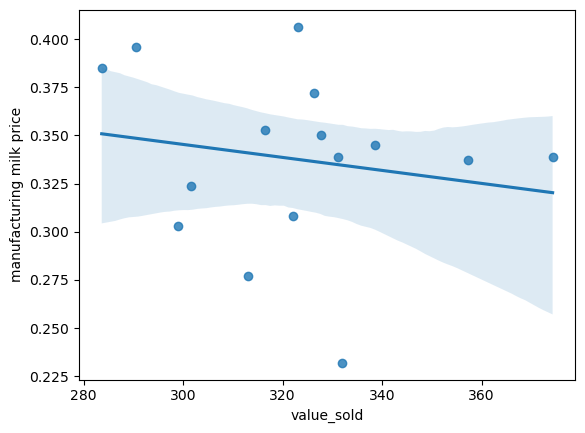

In [24]:
#combining sales and price datasets to check for correlation
#filtering milk sales data on whole milk only to allow for comparison between 2007 and 2021 based on available data from cso office

df_wholemilk_sales0721=df_milk_sales0721.loc[(df_milk_sales0721["Type of Milk"] == "Whole Milk"), ['VALUE','Year','Type of Milk']]
df_wholemilk_sales0721.rename(columns={'VALUE': 'value_sold'}, inplace=True)
#converting value to unit litres from million litres

#Value_litres_sold=df_wholemilk_sales0721['VALUE']*100000000
#print(Value_litres)
#df_wholemilk_sales0721 = df_wholemilk_sales0721.assign(Value_litres_sold=df_wholemilk_sales0721['VALUE']*100000000 )

#df_wholemilk_sales0721.drop(columns=["VALUE"], inplace=True) #dropping columns
#filtering milk sales data on whole milk only 

df_wholemilk_prices0721=df_milk_prices0721.loc[(df_milk_prices0721["Product"] == "Milk (per litre), actual fat and protein"), ['VALUE','Year','Product']]

df_wholemilk_prices0721.rename(columns={'VALUE': 'manufacturing milk price'}, inplace=True)

#joining datasets on year
df_milkfinancials0721=df_wholemilk_sales0721.merge(df_wholemilk_prices0721,on='Year')
df_milkfinancials0721.head()
#scatterplot
sns.regplot(data=df_milkfinancials0721, y='manufacturing milk price', x='value_sold')
#not enough data values to see a correlation, cluster visible when price is between 0.325 and 0.35c/litre. 
#highest value sold in 2007
r = np.corrcoef(x, y)
print('r value=',r)
print('Pearsons_r_value=',scipy.stats.pearsonr(x, y))   # Pearson's r
print('Kendalls tau value=',scipy.stats.kendalltau(x, y))#data is normally distributed

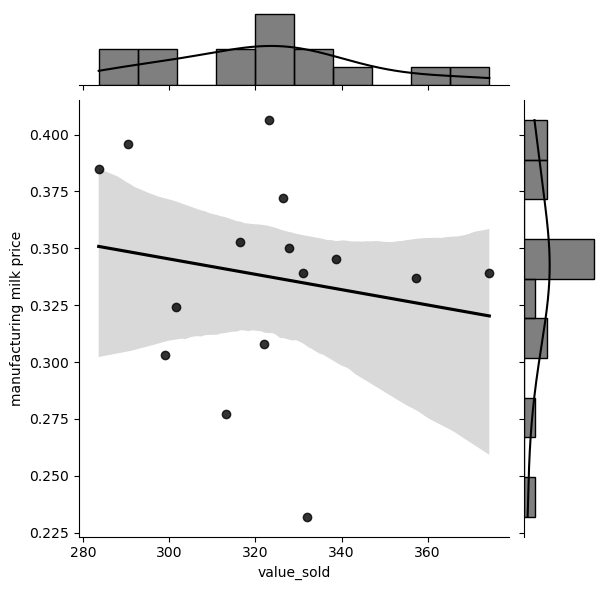

In [25]:
sns.jointplot(x='value_sold', 
              y='manufacturing milk price',kind="reg",color="k",marginal_kws=dict(bins=10),data=df_milkfinancials0721);

In [26]:
df_milkfinancials0721.head()

,value_sold,Year,Type of Milk,manufacturing milk price,Product
0,374.30,2007,Whole Milk,0.339,"Milk (per litre), actual fat and protein"
1,357.30,2008,Whole Milk,0.337,"Milk (per litre), actual fat and protein"
2,331.93,2009,Whole Milk,0.232,"Milk (per litre), actual fat and protein"
3,322.02,2010,Whole Milk,0.308,"Milk (per litre), actual fat and protein"
4,316.38,2011,Whole Milk,0.353,"Milk (per litre), actual fat and protein"


In [27]:
#explore dairy production datasets  https://www.cso.ie/en/releasesandpublications/ep/p-ms/milkstatisticsseptember2022/data/

#print(df_irish_dairy1022.head()) #EDA , no cleaning required
print(df_irish_cheese1022.dtypes)
df_irish_butter1022.describe()#NAN values identified
print("number of null values=",df_irish_skimmedmilkpowder1022.isnull().sum())#26 zero values under VALUE column



STATISTIC Label     object
Month               object
Product             object
UNIT                object
VALUE              float64
dtype: object
number of null values= STATISTIC Label     0
Month               0
Product             0
UNIT                0
VALUE              33
dtype: int64


In [28]:
#cleaning
#separation of month and year column
df_irish_cheese1022['year'],df_irish_cheese1022['month'] = df_irish_cheese1022['Month'].str.split(' ', 2).str
df_irish_butter1022['year'],df_irish_butter1022['month'] = df_irish_butter1022['Month'].str.split(' ', 2).str
df_irish_skimmedmilkpowder1022['year'],df_irish_skimmedmilkpowder1022['month'] = df_irish_skimmedmilkpowder1022['Month'].str.split(' ', 2).str

df_irish_cheese1022['year'].astype(int)
df_irish_butter1022 ['year'].astype(int)
df_irish_skimmedmilkpowder1022['year'].astype(int)

#df_irish_dairy1022.drop(columns=["Month","TLIST(M1)","C02064V02491"], inplace=True) #dropping columns
#df_product_cheese["VALUE"]=df_product_cheese["VALUE"].astype(float)
#df_product_cheese["month"].str.lower() 
df_irish_skimmedmilkpowder1022['VALUE']

C:\Users\teresa\AppData\Local\Temp\ipykernel_21336\1236365999.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_irish_cheese1022['year'],df_irish_cheese1022['month'] = df_irish_cheese1022['Month'].str.split(' ', 2).str
C:\Users\teresa\AppData\Local\Temp\ipykernel_21336\1236365999.py:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_irish_butter1022['year'],df_irish_butter1022['month'] = df_irish_butter1022['Month'].str.split(' ', 2).str
C:\Users\teresa\AppData\Local\Temp\ipykernel_21336\1236365999.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_irish_skimmedmilkpowder1022['year'],df_irish_skimmedmilkpowder1022['month'] = df_irish_skimmedmilkpowder1022['Month'].str.split(' ', 2).str


0       3.00
1        NaN
2       1.30
3       6.80
4      10.90
       ...  
149    26.20
150    22.10
151    16.92
152    13.15
153      NaN
Name: VALUE, Length: 154, dtype: float64

In [29]:
print(df_irish_butter1022['month'].unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [30]:
#cleaning, filling with mean values
df_irish_cheese1022=df_irish_cheese1022.fillna(df_irish_cheese1022 .mean())
df_irish_butter1022=df_irish_butter1022.fillna(df_irish_butter1022 .mean())
df_irish_skimmedmilkpowder1022=df_irish_skimmedmilkpowder1022.fillna(df_irish_skimmedmilkpowder1022 .mean())



C:\Users\teresa\AppData\Local\Temp\ipykernel_21336\3956336429.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_irish_cheese1022=df_irish_cheese1022.fillna(df_irish_cheese1022 .mean())
C:\Users\teresa\AppData\Local\Temp\ipykernel_21336\3956336429.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_irish_butter1022=df_irish_butter1022.fillna(df_irish_butter1022 .mean())
C:\Users\teresa\AppData\Local\Temp\ipykernel_21336\3956336429.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction

In [31]:
#create new subsets per product type
#https://sparkbyexamples.com/pandas/pandas-loc-multiple-conditions/
#df_product_cheese=df_irish_dairy1022.loc[df_irish_dairy1022["Product"] == "Cheese", ['year', 'VALUE']]
#df_product_cheese_10=df_irish_dairy1022.loc[(df_irish_dairy1022["Product"] == "Cheese")& (df_irish_dairy1022["year"] == "2010"), ['VALUE','month']]
#df_product_butter=df_irish_dairy1022.loc[df_irish_dairy1022["Product"] == "Butter", ['year', 'VALUE']]
#df_product_skimmedmilkpowder=df_irish_dairy1022.loc[df_irish_dairy1022["Product"] == "Skimmed Milk Powder", ['year', 'VALUE']]
#df_product_cheese=df_irish_dairy1022.loc[df_irish_dairy1022["Product"] == "Cheese", ['year', 'VALUE']]
#print(df_product_cheese)
df_irish_skimmedmilkpowder1022

,STATISTIC Label,Month,Product,UNIT,VALUE,year,month
0,Production of Dairy Products,2010 January,Skimmed Milk Powder,000 Tonnes,3.000000,2010,January
1,Production of Dairy Products,2010 February,Skimmed Milk Powder,000 Tonnes,10.293967,2010,February
2,Production of Dairy Products,2010 March,Skimmed Milk Powder,000 Tonnes,1.300000,2010,March
3,Production of Dairy Products,2010 April,Skimmed Milk Powder,000 Tonnes,6.800000,2010,April
4,Production of Dairy Products,2010 May,Skimmed Milk Powder,000 Tonnes,10.900000,2010,May
...,...,...,...,...,...,...,...
149,Production of Dairy Products,2022 June,Skimmed Milk Powder,000 Tonnes,26.200000,2022,June
150,Production of Dairy Products,2022 July,Skimmed Milk Powder,000 Tonnes,22.100000,2022,July
151,Production of Dairy Products,2022 August,Skimmed Milk Powder,000 Tonnes,16.920000,2022,August
152,Production of Dairy Products,2022 September,Skimmed Milk Powder,000 Tonnes,13.150000,2022,September


In [32]:
print(df_product_cheese_20['month'].unique())

NameError: name 'df_product_cheese_20' is not defined

In [ ]:
#filtering cheese dataset by year
df_product_cheese_10=df_irish_cheese1022.loc[(df_irish_cheese1022["year"] == "2010"), ['VALUE','month']]
df_product_cheese_11=df_irish_cheese1022.loc[(df_irish_cheese1022["year"] == "2011"), ['VALUE','month']]
df_product_cheese_12=df_irish_cheese1022.loc[(df_irish_cheese1022["year"] == "2012"), ['VALUE','month']]
df_product_cheese_13=df_irish_cheese1022.loc[(df_irish_cheese1022["year"] == "2013"), ['VALUE','month']]
df_product_cheese_14=df_irish_cheese1022.loc[(df_irish_cheese1022["year"] == "2014"), ['VALUE','month']]
df_product_cheese_15=df_irish_cheese1022.loc[(df_irish_cheese1022["year"] == "2015"), ['VALUE','month']]
df_product_cheese_16=df_irish_cheese1022.loc[(df_irish_cheese1022["year"] == "2016"), ['VALUE','month']]
df_product_cheese_17=df_irish_cheese1022.loc[(df_irish_cheese1022["year"] == "2017"), ['VALUE','month']]
df_product_cheese_18=df_irish_cheese1022.loc[(df_irish_cheese1022["year"] == "2018"), ['VALUE','month']]
df_product_cheese_19=df_irish_cheese1022.loc[(df_irish_cheese1022["year"] == "2019"), ['VALUE','month']]
df_product_cheese_20=df_irish_cheese1022.loc[(df_irish_cheese1022["year"] == "2020"), ['VALUE','month']]
df_product_cheese_21=df_irish_cheese1022.loc[(df_irish_cheese1022["year"] == "2021"), ['VALUE','month']]
#df_product_cheese_22=df_irish_cheese1022.loc[(df_irish_cheese1022["year"] == "2022"), ['VALUE','month']]

#filtering butter dataset by year
df_product_butter_10=df_irish_butter1022.loc[(df_irish_butter1022["year"] == "2010"), ['VALUE','month']]
df_product_butter_11=df_irish_butter1022.loc[(df_irish_butter1022["year"] == "2011"), ['VALUE','month']]
df_product_butter_12=df_irish_butter1022.loc[(df_irish_butter1022["year"] == "2012"), ['VALUE','month']]
df_product_butter_13=df_irish_butter1022.loc[(df_irish_butter1022["year"] == "2013"), ['VALUE','month']]
df_product_butter_14=df_irish_butter1022.loc[(df_irish_butter1022["year"] == "2014"), ['VALUE','month']]
df_product_butter_15=df_irish_butter1022.loc[(df_irish_butter1022["year"] == "2015"), ['VALUE','month']]
df_product_butter_16=df_irish_butter1022.loc[(df_irish_butter1022["year"] == "2016"), ['VALUE','month']]
df_product_butter_17=df_irish_butter1022.loc[(df_irish_butter1022["year"] == "2017"), ['VALUE','month']]
df_product_butter_18=df_irish_butter1022.loc[(df_irish_butter1022["year"] == "2018"), ['VALUE','month']]
df_product_butter_19=df_irish_butter1022.loc[(df_irish_butter1022["year"] == "2019"), ['VALUE','month']]
df_product_butter_20=df_irish_butter1022.loc[(df_irish_butter1022["year"] == "2020"), ['VALUE','month']]
df_product_butter_21=df_irish_butter1022.loc[(df_irish_butter1022["year"] == "2021"), ['VALUE','month']]
#df_product_butter_22=df_irish_butter1022.loc[(df_irish_butter1022["year"] == "2022"), ['VALUE','month']]

#filtering skimmedmilkpowder dataset by year
df_product_skimmedmilkpowder_10=df_irish_skimmedmilkpowder1022.loc[(df_irish_skimmedmilkpowder1022["year"] == "2010"), ['VALUE','month']]
df_product_skimmedmilkpowder_11=df_irish_skimmedmilkpowder1022.loc[(df_irish_skimmedmilkpowder1022["year"] == "2011"), ['VALUE','month']]
df_product_skimmedmilkpowder_12=df_irish_skimmedmilkpowder1022.loc[(df_irish_skimmedmilkpowder1022["year"] == "2012"), ['VALUE','month']]
df_product_skimmedmilkpowder_13=df_irish_skimmedmilkpowder1022.loc[(df_irish_skimmedmilkpowder1022["year"] == "2013"), ['VALUE','month']]
df_product_skimmedmilkpowder_14=df_irish_skimmedmilkpowder1022.loc[(df_irish_skimmedmilkpowder1022["year"] == "2014"), ['VALUE','month']]
df_product_skimmedmilkpowder_15=df_irish_skimmedmilkpowder1022.loc[(df_irish_skimmedmilkpowder1022["year"] == "2015"), ['VALUE','month']]
df_product_skimmedmilkpowder_16=df_irish_skimmedmilkpowder1022.loc[(df_irish_skimmedmilkpowder1022["year"] == "2016"), ['VALUE','month']]
df_product_skimmedmilkpowder_17=df_irish_skimmedmilkpowder1022.loc[(df_irish_skimmedmilkpowder1022["year"] == "2017"), ['VALUE','month']]
df_product_skimmedmilkpowder_18=df_irish_skimmedmilkpowder1022.loc[(df_irish_skimmedmilkpowder1022["year"] == "2018"), ['VALUE','month']]
df_product_skimmedmilkpowder_19=df_irish_skimmedmilkpowder1022.loc[(df_irish_skimmedmilkpowder1022["year"] == "2019"), ['VALUE','month']]
df_product_skimmedmilkpowder_20=df_irish_skimmedmilkpowder1022.loc[(df_irish_skimmedmilkpowder1022["year"] == "2020"), ['VALUE','month']]
df_product_skimmedmilkpowder_21=df_irish_skimmedmilkpowder1022.loc[(df_irish_skimmedmilkpowder1022["year"] == "2021"), ['VALUE','month']]
#df_product_skimmedmilkpowder_22=df_irish_skimmedmilkpowder1022.loc[(df_irish_skimmedmilkpowder1022["year"] == "2022"), ['VALUE','month']]




In [ ]:
#tidying up column names for the purposes of visualisation
df_product_cheese_10.rename(columns={'VALUE': '2010'}, inplace=True)
df_product_cheese_11.rename(columns={'VALUE': '2011'}, inplace=True)
df_product_cheese_12.rename(columns={'VALUE': '2012'}, inplace=True)
df_product_cheese_13.rename(columns={'VALUE': '2013'}, inplace=True)
df_product_cheese_14.rename(columns={'VALUE': '2014'}, inplace=True)
df_product_cheese_15.rename(columns={'VALUE': '2015'}, inplace=True)
df_product_cheese_16.rename(columns={'VALUE': '2016'}, inplace=True)
df_product_cheese_17.rename(columns={'VALUE': '2017'}, inplace=True)
df_product_cheese_18.rename(columns={'VALUE': '2018'}, inplace=True)
df_product_cheese_19.rename(columns={'VALUE': '2019'}, inplace=True)
df_product_cheese_20.rename(columns={'VALUE': '2020'}, inplace=True)
df_product_cheese_21.rename(columns={'VALUE': '2021'}, inplace=True)
#df_product_cheese_22.rename(columns={'VALUE': '2022'}, inplace=True)

df_product_butter_10.rename(columns={'VALUE': '2010'}, inplace=True)
df_product_butter_11.rename(columns={'VALUE': '2011'}, inplace=True)
df_product_butter_12.rename(columns={'VALUE': '2012'}, inplace=True)
df_product_butter_13.rename(columns={'VALUE': '2013'}, inplace=True)
df_product_butter_14.rename(columns={'VALUE': '2014'}, inplace=True)
df_product_butter_15.rename(columns={'VALUE': '2015'}, inplace=True)
df_product_butter_16.rename(columns={'VALUE': '2016'}, inplace=True)
df_product_butter_17.rename(columns={'VALUE': '2017'}, inplace=True)
df_product_butter_18.rename(columns={'VALUE': '2018'}, inplace=True)
df_product_butter_19.rename(columns={'VALUE': '2019'}, inplace=True)
df_product_butter_20.rename(columns={'VALUE': '2020'}, inplace=True)
df_product_butter_21.rename(columns={'VALUE': '2021'}, inplace=True)
#df_product_butter_22.rename(columns={'VALUE': '2022'}, inplace=True)

df_product_skimmedmilkpowder_10.rename(columns={'VALUE': '2010'}, inplace=True)
df_product_skimmedmilkpowder_11.rename(columns={'VALUE': '2011'}, inplace=True)
df_product_skimmedmilkpowder_12.rename(columns={'VALUE': '2012'}, inplace=True)
df_product_skimmedmilkpowder_13.rename(columns={'VALUE': '2013'}, inplace=True)
df_product_skimmedmilkpowder_14.rename(columns={'VALUE': '2014'}, inplace=True)
df_product_skimmedmilkpowder_15.rename(columns={'VALUE': '2015'}, inplace=True)
df_product_skimmedmilkpowder_16.rename(columns={'VALUE': '2016'}, inplace=True)
df_product_skimmedmilkpowder_17.rename(columns={'VALUE': '2017'}, inplace=True)
df_product_skimmedmilkpowder_18.rename(columns={'VALUE': '2018'}, inplace=True)
df_product_skimmedmilkpowder_19.rename(columns={'VALUE': '2019'}, inplace=True)
df_product_skimmedmilkpowder_20.rename(columns={'VALUE': '2020'}, inplace=True)
df_product_skimmedmilkpowder_21.rename(columns={'VALUE': '2021'}, inplace=True)
#df_product_skimmedmilkpowder_22.rename(columns={'VALUE': '2022'}, inplace=True)



In [ ]:
#merging filtered datasets
x1=df_product_cheese_10.merge(df_product_cheese_11,on='month').merge(df_product_cheese_12,on='month')
x2=df_product_cheese_13.merge(df_product_cheese_14,on='month').merge(df_product_cheese_15,on='month')
x3=df_product_cheese_16.merge(df_product_cheese_17,on='month').merge(df_product_cheese_18,on='month')
x4=df_product_cheese_19.merge(df_product_cheese_20,on='month').merge(df_product_cheese_21,on='month')
#x5=x4.merge(x1,on='month').merge(df_product_cheese_22,on='month').merge(x2,on='month')
x5=x4.merge(x1,on='month').merge(x2,on='month')
df_cheese1020=x4.merge(x5,on='month').merge(x3,on='month').merge(x4,on='month')
      
y1=df_product_butter_10.merge(df_product_butter_11,on='month').merge(df_product_butter_12,on='month')
y2=df_product_butter_13.merge(df_product_butter_14,on='month').merge(df_product_butter_15,on='month')
y3=df_product_butter_16.merge(df_product_butter_17,on='month').merge(df_product_butter_18,on='month')
y4=df_product_butter_19.merge(df_product_butter_20,on='month').merge(df_product_butter_21,on='month')
y5=y4.merge(y1,on='month').merge(y2,on='month')
df_butter1020=y4.merge(y5,on='month').merge(y3,on='month').merge(y4,on='month')


z1=df_product_skimmedmilkpowder_10.merge(df_product_skimmedmilkpowder_11,on='month').merge(df_product_skimmedmilkpowder_12,on='month')
z2=df_product_skimmedmilkpowder_13.merge(df_product_skimmedmilkpowder_14,on='month').merge(df_product_skimmedmilkpowder_15,on='month')
z3=df_product_skimmedmilkpowder_16.merge(df_product_skimmedmilkpowder_17,on='month').merge(df_product_skimmedmilkpowder_18,on='month')
z4=df_product_skimmedmilkpowder_19.merge(df_product_skimmedmilkpowder_20,on='month').merge(df_product_skimmedmilkpowder_21,on='month')
z5=z4.merge(z1,on='month').merge(z2,on='month')
df_skimmedmilkpowder1020=z4.merge(z5,on='month').merge(z3,on='month').merge(z4,on='month')


#reordering columns for visualisation purpose
df_cheese1020 = df_cheese1020[['month','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']]
df_butter1020 = df_butter1020[['month','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']]
df_skimmedmilkpowder1022 = df_skimmedmilkpowder1020[['month','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']]

In [ ]:
df_cheese1020['month']

In [ ]:

#showing every 2nd year to make graph more readable
#production highest between may,june.As the temperatures drop, so can milk production. When it is cold, cows can divert their energy into maintaining body temperature instead of producing milk.
#How do seasons affect milk production?
#Monthly milk yield was highest during the spring and lowest in winter. Highest milk yield for early and midlactation cows was in the spring, whereas late lactation cows performed best in the summer.

In [ ]:
#bar chart showing production
melt_df1 = pd.melt(df_cheese1020, id_vars=['month' ],  value_vars=['2010','2014','2018','2021'], var_name='year', value_name='amount')
melt_df1['amount']=melt_df1['amount'].astype(float)

sequential_colors = sns.color_palette("Greens", 10)
#sns.palplot(sequential_colors)

sns.set(style='whitegrid', context='talk') 
g = sns.catplot(data=melt_df1, x="amount", y="month", col="year", kind="bar",height=20,aspect=0.4, palette='Greens');
plt.suptitle("'Production of Cheese in Ireland between 2010 and 2020 by  month", fontsize=30, x=.25, y=1.06, fontweight='bold')

plt.savefig('Cheese production between 2010 and 2021.png')
plt.show()

In [ ]:
#bar chart showing production
melt_df2 = pd.melt(df_butter1020, id_vars=['month' ],  value_vars=['2010','2014','2018','2021'], var_name='year', value_name='amount')
melt_df2['amount']=melt_df2['amount'].astype(float)
sequential_colors = sns.color_palette("Greens", 10)
sns.set(style='whitegrid', context='talk') 
g = sns.catplot(data=melt_df2, x="amount", y="month", col="year", kind="bar",height=20,aspect=0.4, palette='Greens');
plt.suptitle("'Production of Butter in Ireland between 2010 and 2020 by  month", fontsize=30, x=.25, y=1.06, fontweight='bold')

plt.savefig('Butter production between 2010 and 2021.png')
plt.show()

In [ ]:
#bar chart showing production
melt_df3 = pd.melt(df_skimmedmilkpowder1022, id_vars=['month' ],  value_vars=['2010','2015','2019','2021'], var_name='year', value_name='amount')
melt_df3['amount']=melt_df3['amount'].astype(float)
sequential_colors = sns.color_palette("Greens", 10)
sns.set(style='whitegrid', context='talk') 
g = sns.catplot(data=melt_df3, x="amount", y="month", col="year", kind="bar",height=20,aspect=0.4, palette='Greens');
plt.suptitle("'Production of Skimmed Milk Powder in Ireland between 2010 and 2020 by  month", fontsize=30, x=.25, y=1.06, fontweight='bold')

plt.savefig('Skimmed Milk Powder production between 2010 and 2021.png')
plt.show()

In [ ]:
#getting sum per year of production to compare with other countries
#unit 000 tonnes

#df_cheese1020.loc['Column_Total'] = df_cheese1020.sum(numeric_only=True, axis=0)

sum_total = df_cheese1020.select_dtypes(pd.np.number).sum().rename('total_sum')
#append sums to the data frame
df_cheese1020_sum=df_cheese1020.append(sum_total)


#sum_total

# displaying the DataFrame as a table and graphing the total values
print(tabulate(df_cheese1020_sum, headers = 'keys', tablefmt = 'simple'))
total_sum=(171.9,   179.7 ,  185.5 ,  182.8,   188.4,   206.9,   204.9,   259.2,   269.5 ,  278.4   ,285.6 ,  287.1)
Year=('2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021')

In [ ]:
x = Year
y = total_sum

#plt.figure(figsize=(8,5))

#plt.bar(x, y, label='Year', color='yellow',  width=.6, align='center', alpha=0.7)
#plt.xticks(rotation=90)
#plt.xlabel('YEAR', fontsize = 12)
plt.ylabel('Production in 000 tonnes', fontsize = 12)

fig, ax = plt.subplots()
width = 0.75
ind = np.arange(len(y))
 
ax.barh(x, y, width, color = "green")
 
for i, v in enumerate(y):
    ax.text(v + 3, i + .1, str(v),
            color = 'black', fontweight = 'bold')
plt.title('Production of Cheese in Ireland in 000s tonnes between 2007 and 2021')


#separate type of milk

#compare like for like countries, give reasons why, use country flag colours